# Boosting and Advanced Sklearn

<b>Goals</b>

- Follow up our lesson on ensemble methods with boosting, what it is and how it works.
- Use the super AdaBoost Boosting Classifier/Regressor.
- How to use high-powered tools in sklearn to optimize your models and minimize your work load and time

In [130]:
#Gradient boosting will be leanred on our own, but George will share materials with us. 

## Boosting

- Boosting is an ensemble method where a model is comprised of a sequence of models, as opposed to a set of parallel models as with Random Forest.
- Unlike bagging, boosting uses random subsets of training data <b>WITHOUT</b> replacement.
- It is an iterative process. Begins by training simple model on the whole data, pinpoints the inaccuracies, and trains a new model to target those inaccuracies (misclassification rate, residuals.) The new models try to predict what the previous ones were unable to correctly predict. Repeat until reaching a stopping point parameter. The whole set of models is what's used to make predictions.
- Boosting process:
    - Randomly select a batch of data from training dataset without replacement to train "weak learner."
    - Randomly select a second batch of data from training dataset without replacement AND add around half of the samples that were misclassified from the previous model.
    - Go back to the original training dataset and retrieve the data points in which the two models had differing classifications.
    - Make predictions by combining the system of weak learners and takin the vote (classification) or avearge (regression.)
    
- Can be used both for regression and classification

In [131]:
#fitting a sequence of weak classifers, which is better than by random chance. 

### AdaBoost Classifier

- The AdaBoost (Adaptive Boosting) algorithm fits sequential weak classifiers, which are classifiers that are slightly better than random chance. These classifiers are usually tree-based models with a lower depth level. Adaboost actually uses the whole training dataset instead of sample. The data is weighted in each iteration of modeling to help it learn from the mistakes of the previous models.

- The weak learners in the AdaBoost algorithm are Decision Trees with one depth-level aka "Decision Stumps." They literally only use one decision.

- Each data point in the training data is assigned a weight. In the first model, every point has the same weight value which equal 1/number of values. 

- The first Decision Stump is fit on the whole data using weighted samples. Only works with binary clasification problems. The model outputs either a 1 or - 1, irregardless of the class labels in the target variable. 

- Error determined by the misclassification rate, which is 1 - accuracy score. Accuracy score of 0.71 means error rate of 0.29.

- However error significantly changes when different weights are introduced. 

- With weights, error = sum(w(i) * terror(i)) / sum(w). If terror is 1, then equals wrong prediction, 0 if correct.

AdaBoost visually explained:

![a](https://www.analyticsvidhya.com/wp-content/uploads/2015/11/bigd.png)

Source: [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/)

Box 1: Each data point has equal weighting is fit on a decision stump which is a vertical line.

<br>

Box 2: The three plus signs that were incorrectly classified in Box 1 have been enlarged (weighted) and the model has been retrained.

<br>

Box 3: Three minus signs have been given bigger weight values and the new model (horizontal line) has been fit to account for that.

<br>

Box 4: Combines the three Decision stump models, which vastly outperforms any of the three stumps.

Let's manually calculate weights

In [132]:
#List of weights. 1/5
w = [0.2, 0.2, 0.2, 0.2, 0.2]
#List of actual values
y = [1,  1, -1, 1, -1]
#List of predictions
p = [-1, 1, 1, 1, -1]
#List or terrors
t = [1, 0, 1, 0 , 0]

In [133]:
#Regular error rate calculation
(1 + 0 + 1 + 0 + 0)/(1 + 1 + 1 + 1 + 1.)

0.4

In [134]:
#Error calculation with weights (same product as above)
e = (0.2 * 1 + 0.2 * 0 + 0.2 * 1 + 0.2 * 0 + 0.2 * 0)/ (0.2 + 0.2 + 0.2 + 0.2 + 0.2)
e

0.4

In the next part we pass in the error rate through this function: 0.5 * log((1-e)/e)

This gives a coefficient: a

In [135]:
#Import numpy
import numpy as np

a = 0.5 * np.log((1 - e)/ e)
a

0.20273255405408211

We use this value to update our new weights.

Formula is old weight value times the exponent of the negative value of a times prediction times actual value

In [136]:
#First value

w1 = 0.2 * np.exp(-a * 1 * -1)
w1

w2 = 0.2 * np.exp(-a * 1 * 1)
w2

w3 = 0.2 * np.exp(-a * 1 * -1)
w3

w4 = 0.2 * np.exp(-a * 1 * 1)
w4

w5 = 0.2 * np.exp(-a * 1 * 1)
w5

print (w1, w2, w3, w4, w5)

(0.2449489742783178, 0.16329931618554525, 0.2449489742783178, 0.16329931618554525, 0.16329931618554525)


Weights go up for wrong predictions and go down for correct ones.

We're not finished yet.

Then we normalize the weight by diving each weight by the sum of weights

In [137]:
weight_sum = w1 + w2 + w3 + w4 + w5

#New weights
w1 = w1/(weight_sum)
w2 = w2/(weight_sum)
w3 = w3/(weight_sum)
w4 = w4/(weight_sum)
w5 = w5/(weight_sum)

print (w1, w2, w3, w4, w5)

(0.24999999999999994, 0.16666666666666669, 0.24999999999999994, 0.16666666666666669, 0.16666666666666669)


These are our new weights which we'll use in the next round of modeling

In the follow - up model, a second Decision Stump model is trained using our new weights. The weights are used to determine the split in the decision tree. This process continues until we reach the n_estimators parameter we set.

Increasing the weights for the mis-classified data points forces the models to train more heavily on the data it incorrectly classified.

In [138]:
#Error calculation with weights (same product as above). ne = new error. The split is determinted by new weights. 
ne = (w1 * 1 + w2 * 1 + w3 * 0 + w4 * 1 + w5 * 0)/ weight_sum
ne

0.59536209025980003

### Predictions

- AdaBoost makes predictions by calculating the weighted average of the sequence of Decision Stumps. 

- When you pass in a new data point, the model predicts 1 or -1.

- The weights of each model by each one's stage value. The prediction is derived from the sum of the of the weighted predictions. If sum > 0 then return the first class else return second class.

In [139]:
#Five model predictions
preds = np.array([-1, -1, 1, -1, 1])
preds.sum()

-1

Without weighting the prediction would be -1.

In [140]:
weights = np.array([.2, .4, .8, .3, .9])

sum(weights * preds)

0.80000000000000004

Prediction with weighted models equals 1.

In [141]:
#weights will influence the predictions with the 5 models in this example

In [142]:
#a lot of data is better for these models because you don't want the decision boundaries to chase outliers.
#it will mess with the sequence of predictions.


<b>Warnings</b>

- Requires rich data noisy data by design can negatively influence model.
- Same goes with outliers, the model will chase outliers.

In [143]:
# you also do not want to overfit the models.

### Coding AdaBoost

1. Visualize the decision boundaries of AdaBoost

2. Use AdaBoost on the spotify dataset

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Generate and visualize fake data

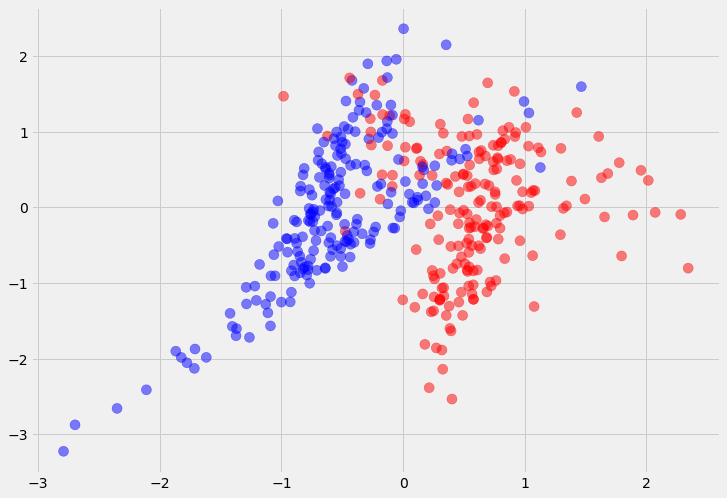

In [2]:

#Generate fake data that is 400 x 2.
data = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, 
                    class_sep=.54, random_state = 8)

df = pd.DataFrame(data[0], columns=["feature1", "feature2"])
#Add target variable to df 
df["target"] = data[1]

#Call scatter plot of feature1 vs feature2 with color-encoded target variable
plt.style.use("fivethirtyeight")
plt.figure(figsize=(11, 8))
#Color encode target variable
colors = df.target.map({0:"b", 1:"r"})
plt.scatter(df.feature1, df.feature2, c = colors, s = 100, alpha=.5);

In [3]:
#Assign X and y
X = df.drop("target", axis = 1)
y = df.target

#Fit a Decision Tree model with max_depth = 1 on the data.
dt = DecisionTreeClassifier(max_depth = 1)

dt.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
#Decision boundary function
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    plt.rcParams["figure.figsize"] = (10,7)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, alpha=0.4, s = 50)

In [5]:
#Feed dt model, features and colors
plot_decision_boundary(dt, X.values, colors);

NameError: global name 'np' is not defined

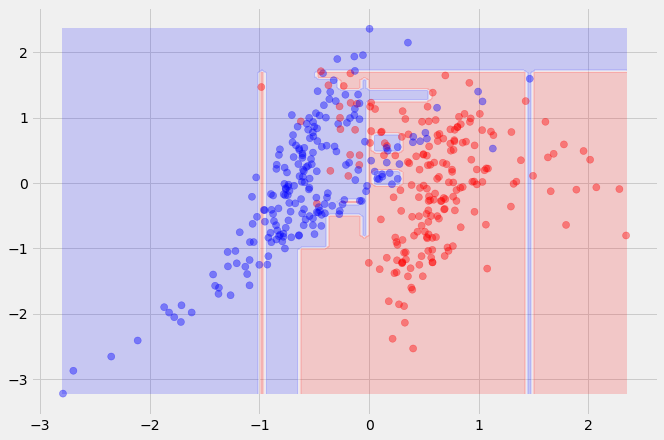

In [149]:
#Train AdaBoost model on the same data and visualize it

#Intialize AdaBoost model with 20 estimators
ada = AdaBoostClassifier(n_estimators= 50)

#Fit model
ada.fit(X, y)

#Visualize model boundaries
plot_decision_boundary(ada, X.values, colors);

In [150]:
#there's a little bit of overfitting in the two thin lines, but overall does a good job at predicting both classes.
#Maybe we have too many estimators, number of sequencial data.

Let's use AdaBoost on Spotify data

In [2]:
#Import spotify data
import pandas as pd


spotify = pd.read_csv("../data/spotify_data.csv", index_col=[0])
spotify.head()

,acousticness,danceability,instrumentalness,valence,energy,target
Mask_Off***Future,0.0102,0.833,0.021900,0.286,0.434,1
Redbone***Childish_Gambino,0.1990,0.743,0.006110,0.588,0.359,1
Xanny_Family***Future,0.0344,0.838,0.000234,0.173,0.412,1
Master_Of_None***Beach_House,0.6040,0.494,0.510000,0.230,0.338,1
Parallel_Lines***Junior_Boys,0.1800,0.678,0.512000,0.904,0.561,1


Compare and contrast Decision Trees and AdaBoost

In [3]:
#Intialize Decision Stump
ds = DecisionTreeClassifier(max_depth=1)

#Intialize AdaBoost with 300 estimators. 300 is arbitrary for now. Will maximize efficiency later..
ada = AdaBoostClassifier(n_estimators= 300)

In [4]:
#Assign X and y

X = spotify.drop("target", axis = 1)

y = spotify.target

In [5]:
#Null accuracy

y.value_counts(normalize= True)

1    0.505702
0    0.494298
Name: target, dtype: float64

In [6]:
#Train test split with test size = 0.33 and random_state = 12

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33,
                                                   random_state = 12)

In [7]:
#Fit Decision Stump on training data and score it on training and testing sets
ds.fit(X_train, y_train)

print (ds.score(X_train, y_train), ds.score(X_test, y_test))

(0.6498889711324944, 0.6276276276276276)


In [8]:
#Fit Ada boost model on training data and score it on testing

ada.fit(X_train, y_train)

print (ada.score(X_train, y_train), ada.score(X_test, y_test))

(0.7786824574389342, 0.6816816816816816)


In [158]:
#right now, there's an overfit because of the gap between the two, train and test.

Cross validate both models

In [9]:
#Cross validate DT, take at least 5 to 7 splits or folds.

cross_val_score(DecisionTreeClassifier(max_depth=1), X, y, cv = 5, scoring = "accuracy").mean()

0.6261528634253002

In [160]:
#Cross validate ADA

In [14]:
cross_val_score(AdaBoostClassifier(n_estimators=300), X, y, cv = 5, scoring = "accuracy").mean()

0.63064638970100473

In [162]:
#it's not really "boosting" here. In this case AdaBoosting is not the cheat code. We will need to do some pruning
#this is considered a black box because there's lack of interpretability. 
#Boosting is a black box element because there's some faith in the formula. 

In [15]:
#feature importance trick

zip(ada.feature_importances_, X.columns)

[(0.28000000000000003, 'acousticness'),
 (0.20666666666666667, 'danceability'),
 (0.17999999999999999, 'instrumentalness'),
 (0.17333333333333334, 'valence'),
 (0.16, 'energy')]

Cross validation shows AdaBoost doesn't really improve our model.

Perhaps we chose the wrong estimator value.

Let's make a validation curve to determine the best value for the estimator.

<br>

This will take a while.

In [16]:
#We're going to time our code. Profiling, to time the code, to see how I can shave off seconds here and there. 
#Performance. jan 1st, 1970.. how much time has passed after this date!
#t is the new time after the code....

#Import time tool
from time import time

In [17]:
#Intialize time variable
t = time()

#Create list of estimator values
estimators = range(50, 1050, 100)

#Intialize cross validation scores list
cv_scores = []

#Iterate over estimators values, fit models, and then append scores to cv_scores
for est in estimators:
    model = AdaBoostClassifier(n_estimators= est)
    score = cross_val_score(model, X, y, cv = 5, scoring = "accuracy").mean()
    cv_scores.append(score)
    
#Print difference in time
print (time() - t)


95.3759970665


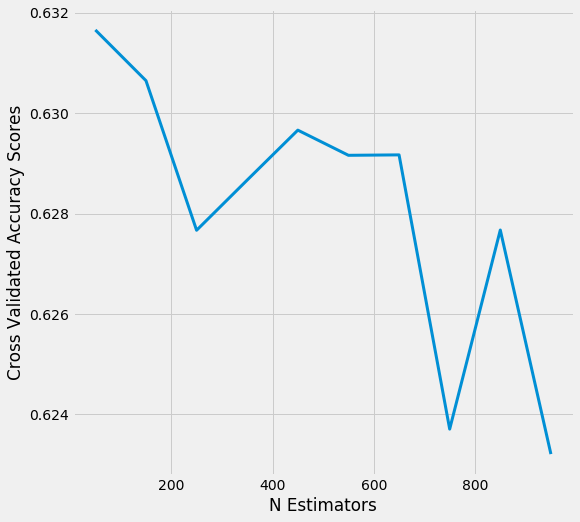

In [18]:
    
#Plot estimators versus scores
plt.figure(figsize = (8, 8))
plt.plot(estimators, cv_scores, linewidth = 3)
plt.xlabel("N Estimators")
plt.ylabel("Cross Validated Accuracy Scores");


In [19]:
#Derive best estimator value
sorted(zip(cv_scores, estimators), reverse = True)[0]

(0.63165491487113967, 50)

In [168]:
# 50 is the new parameter for number of estimators. 

What if I told you there was a more efficient way to find the best parameter for a given model? The best depth or K-neighbors, etc?

## Advanced Sklearn tools

Overview:

- Grid search
- Pipelinings
- Imputation
- Feature unions
- Feature selections

In [20]:
#More imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Gridsearch

Algorithm that tests every combination of model parameters to find the best one.

Let's use GridSearch to find the best K value for a KNN model and Spotify data

In [16]:
#Intialize parameter grid

#Range of neighbors to test
neighbors_range = range(1, 21, 2)

#Dictionary of parameter values 
param_grid_knn = {}
param_grid_knn["n_neighbors"] = neighbors_range

param_grid_knn

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

In [11]:
#Intialize Grid

grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid = param_grid_knn, cv = 5, scoring = "accuracy")

#Fit grid on data

grid_knn.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [12]:
#The scores
grid_knn.grid_scores_

[mean: 0.56668, std: 0.03445, params: {'n_neighbors': 1},
 mean: 0.58404, std: 0.04995, params: {'n_neighbors': 3},
 mean: 0.58007, std: 0.05479, params: {'n_neighbors': 5},
 mean: 0.57759, std: 0.05078, params: {'n_neighbors': 7},
 mean: 0.58999, std: 0.05879, params: {'n_neighbors': 9},
 mean: 0.60337, std: 0.06452, params: {'n_neighbors': 11},
 mean: 0.59891, std: 0.05833, params: {'n_neighbors': 13},
 mean: 0.60089, std: 0.05880, params: {'n_neighbors': 15},
 mean: 0.59841, std: 0.05767, params: {'n_neighbors': 17},
 mean: 0.60139, std: 0.05741, params: {'n_neighbors': 19}]

In [17]:
#Whats the best cross validated accuracy score
grid_knn.best_score_


0.6033713435795737

In [60]:
#Find the best parameters
grid_knn.best_params_
#11 K's will give us the best model

{'n_neighbors': 11}

In [19]:
grid_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

This simple technique gives us the best K value.

We can use the best model from grid_knn to make predictions.

In [27]:
#Input random numbers...
x = [[0.2, .15, 0.68, 0.05, 0.328]]

#Make prediction 
grid_knn.predict(x)

array([1])

In [28]:
#Get probability
grid_knn.predict_proba(x)

array([[ 0.18181818,  0.81818182]])

In [25]:
#81% chance that I like the song!!! But keep in mind this is just random input data.

Quick exercise:
<br>
Use grid search to determine the best depth value in a decision tree. Use depths from 2 - 20.

In [29]:
#Range of neighbors to test
depths_range = range(2, 20)

#Dictionary of parameter values 
param_grid_dt = {}
param_grid_dt["max_depth"] = depths_range

param_grid_dt

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

The CV in GridSearchCV stands for cross validation which means we have to set a cv and scoring value.

In [30]:
#Intialize Grid

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")

#Fit grid on data

grid_dt.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [33]:
grid_dt.grid_scores_

[mean: 0.63907, std: 0.06683, params: {'max_depth': 2},
 mean: 0.64303, std: 0.06100, params: {'max_depth': 3},
 mean: 0.66187, std: 0.04178, params: {'max_depth': 4},
 mean: 0.64650, std: 0.02908, params: {'max_depth': 5},
 mean: 0.63609, std: 0.03772, params: {'max_depth': 6},
 mean: 0.63609, std: 0.03292, params: {'max_depth': 7},
 mean: 0.61230, std: 0.03622, params: {'max_depth': 8},
 mean: 0.62766, std: 0.03204, params: {'max_depth': 9},
 mean: 0.60833, std: 0.02724, params: {'max_depth': 10},
 mean: 0.60486, std: 0.02082, params: {'max_depth': 11},
 mean: 0.58949, std: 0.02719, params: {'max_depth': 12},
 mean: 0.60982, std: 0.01939, params: {'max_depth': 13},
 mean: 0.59296, std: 0.02893, params: {'max_depth': 14},
 mean: 0.59346, std: 0.02424, params: {'max_depth': 15},
 mean: 0.58304, std: 0.02665, params: {'max_depth': 16},
 mean: 0.58701, std: 0.03061, params: {'max_depth': 17},
 mean: 0.57908, std: 0.02428, params: {'max_depth': 18},
 mean: 0.58057, std: 0.03182, params: {

In [31]:
#Best score for DT model
grid_dt.best_score_

0.6618740704015865

In [32]:
#Best parameter for DT model
grid_dt.best_params_

{'max_depth': 4}

In [35]:
#Make prediction
#Same random numbers...
x = [[0.2, .15, 0.68, 0.05, 0.328]]

grid_dt.best_estimator_

grid_dt.predict(x)

array([1])

In [40]:
#This song, x, is class 1, and George likes this song!

So far our grids have been one-dimensional, now let's try using multiple dimensions

In [41]:
#Param grid with test different split criteria as well. entropy takes the log. gini takes the squared...
param_grid_dt = {"criterion": ["gini", "entropy"], "max_depth": depths_range}

param_grid_dt

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

It's going to cross-validate every combination between the criterion parameters and depth parameters.

In [42]:
#Intialize Grid
grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")
#Fit grid on data
grid_dt.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [43]:
#Best parameter
grid_dt.best_params_


{'criterion': 'gini', 'max_depth': 4}

In [44]:
#Best score
grid_dt.best_score_


0.6608824987605354

How many models did this grid search function conduct?

In [45]:
grid_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Let's add in some parameters

In [46]:
from time import time
param_grid_dt["min_samples_split"] = [2, 10, 20]
param_grid_dt["max_features"] = [1, 2, 3, 4, 5]

In [49]:
#Intialize Grid
grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")

#Time the code 

t = time()

#Fit grid on data
grid_dt.fit(X, y)

#Print time difference

print (time() - t)

19.5713131428


In [50]:
#Best parameter
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 4,
 'min_samples_split': 10}

In [51]:
#Best score
grid_dt.best_score_

0.6638572136836887

In [52]:
#Make prediction
grid_dt.predict(x)

array([1])

In [54]:
grid_dt.predict_proba(x)

array([[ 0.26106195,  0.73893805]])

In [ ]:
#there's a 73% chance that he will like this song!

Obviously grid search takes a long time and in some case can cause memory errors. This is where RandomizedSearchCV comes in.

In [55]:
#Import ... BIG DATA trade off between performance or TIME? 
from sklearn.grid_search import RandomizedSearchCV

Functions just like GridSearchCV, except we have to choose a value n_iter which is the random number of combinations we testing and set param_distributions instead of param_grid.

In [56]:
#Intialize RandomizedSearchCV grid with n_iter = 20
grid_dt = RandomizedSearchCV(DecisionTreeClassifier(), n_iter = 20,
                            param_distributions = param_grid_dt, cv = 5, scoring = "accuracy")

#Time the code 

t = time()

#Fit grid on data
grid_dt.fit(X, y)

#Print time difference

print (time() - t)

0.751661062241


Reduced run time by 96%!

But now let's see if we sacrificed performance. Remember our previous best score was 0.667.

In [57]:
#Check best score
grid_dt.best_score_

0.6514625681705504

In [ ]:
#from 19 seconds to .75 seconds with RandomizedSearchCV

By going from about 24 seconds to 0.87 we sacrificed 0.009 percentage points in accuracy.

Good trade-off?

In [58]:
0.6638572136836887-0.6514625681705504

0.012394645513138292

In [ ]:
#0.012 percentage points in accuracy difference is the trade-off byusing RandomizedSearchCV

### Pipelines

Let's go back to using the KNN model.


We know that we need to scale our data for the KNN algorithm right?

In [59]:
#Scale data and fit it a Grid search function it.

#Intialize scalar
scale = StandardScaler()

#Fit and transform scaler on the data
Xs = scale.fit_transform(X)
Xs[0]

array([-0.68246675,  1.33287384, -0.40786448, -0.8530387 , -1.17770008])

In [60]:
#Intialize Grid

grid_knn_s = GridSearchCV(KNeighborsClassifier(), param_grid= param_grid_knn,
                         cv = 5, scoring = "accuracy")

#Fit grid on scaled data
grid_knn_s.fit(Xs, y)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [61]:
#Best score
grid_knn_s.best_score_

0.6043629152206247

In [62]:
#Best K value
grid_knn_s.best_params_

{'n_neighbors': 17}

In [79]:
#Make prediction
#First transform predict using scaler, we have to scale the random input for x (song attributes)
x = [[0.0102, 0.833, 0.021900, 0.286, 0.434]]

xs = scale.transform(x)

#Pass in xs to grid model
grid_knn_s.predict(xs)
# This is the hard way...

array([1])

In [73]:
grid_knn_s.predict_proba(xs)
#there's an 88% chance that George will like this song!

array([[ 0.05882353,  0.94117647]])

Time to make a pipeline.

In [76]:
#Pass scaler and knn classifier objects into make_pipeline function
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [77]:
#Create new param_grid
neighbors_range = range(3, 33, 2)
param_grid_knn = {}
param_grid_knn["kneighborsclassifier__n_neighbors"] = neighbors_range
param_grid_knn

{'kneighborsclassifier__n_neighbors': [3,
  5,
  7,
  9,
  11,
  13,
  15,
  17,
  19,
  21,
  23,
  25,
  27,
  29,
  31]}

In [82]:

#Pass in pipe into GridSearchCV function, 
grid_knn_pipe = GridSearchCV(pipe, param_grid= param_grid_knn, cv = 5, scoring = "accuracy")

#Fit on original versions of data
grid_knn_pipe.fit(X, y)

#Best scores and params
grid_knn_pipe.best_score_

0.6063460585027268

In [85]:
grid_knn_pipe.best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform'))])

In [83]:
grid_knn_pipe.best_params_

#grid search helps us make these optimized models. Pipeline also works for Cross Validated Score function as well. 

{'kneighborsclassifier__n_neighbors': 17}

You can also pass in the pipe object into a cross_val_score function

In [87]:
# Use the cross-validation process using Pipeline. pipe becomes the estimator
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=17))
cross_val_score(pipe, X, y, cv = 5, scoring = "accuracy").mean()

0.60633491388841121

Class exercise: Use grid search to model the 2016 Democratic primary data.

In [88]:
# skip down to see the full Feature Engineering code in one block. 
#explored data structure manually here.....

county = pd.read_csv("../data/primary_data/county_facts.csv")

In [98]:
county.head()

,fips,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
0,0,318857056,3.3,14.5,50.8,13.2,62.1,12.9,28.8,25.5,53046,15.4,87.4
1,1000,4849377,1.4,15.3,51.5,26.7,66.2,3.5,22.6,24.2,43253,18.6,94.4
2,1001,55395,1.5,13.8,51.4,18.7,75.6,1.6,20.9,26.2,53682,12.1,91.8
3,1003,200111,9.8,18.7,51.2,9.6,83.0,3.6,27.7,25.9,50221,13.9,114.6
4,1005,26887,-2.1,16.5,46.6,47.6,46.6,2.9,13.4,24.6,32911,26.7,31.0


In [89]:
county_dict = pd.read_csv("../data/primary_data/county_facts_dictionary.csv")

In [90]:
subset_col_index = [0,3,5,9,10,12,18,20,23,25,33,34,53]

In [91]:
county = county.iloc[:,subset_col_index].copy()

In [92]:
county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 13 columns):
fips         3195 non-null int64
PST045214    3195 non-null int64
PST120214    3195 non-null float64
AGE775214    3195 non-null float64
SEX255214    3195 non-null float64
RHI225214    3195 non-null float64
RHI825214    3195 non-null float64
POP645213    3195 non-null float64
EDU685213    3195 non-null float64
LFE305213    3195 non-null float64
INC110213    3195 non-null int64
PVY020213    3195 non-null float64
POP060210    3195 non-null float64
dtypes: float64(10), int64(3)
memory usage: 324.6 KB


In [93]:
subset_cols = ["fips","population", "pop_change", "senior_pop_per", "female_pop_per", "black_pop_per",
               "white_pop_per", "foreign_pop_per", "college_degree_pop_", "commute_time", "median_income",
               "poverty_rate", "pop_density"]

In [94]:
col_dict = dict(zip(county.columns, subset_cols))

In [95]:
county.rename(columns=col_dict, inplace=True)

In [99]:
primary.dropna(inplace=True)

NameError: name 'primary' is not defined

In [97]:
bern = primary[primary.candidate== "Bernie Sanders"]

NameError: name 'primary' is not defined

In [320]:
bern = bern[["fips", "candidate", "votes"]]

In [321]:
dem = pd.merge(hill, bern, on="fips")

In [323]:
dem.rename(columns={"votes_x":"clinton_votes", "votes_y":"sanders_votes"}, inplace=True)
dem.head()

,state,state_abbreviation,county,fips,party,candidate_x,clinton_votes,fraction_votes,candidate_y,sanders_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,Bernie Sanders,544
1,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647,Bernie Sanders,2694
2,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906,Bernie Sanders,222
3,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755,Bernie Sanders,246
4,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551,Bernie Sanders,395


In [325]:
dem["winner"] = dem.clinton_votes - dem.sanders_votes
dem.head()

,state,state_abbreviation,county,fips,party,candidate_x,clinton_votes,fraction_votes,candidate_y,sanders_votes,winner
0,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,Bernie Sanders,544,1843
1,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647,Bernie Sanders,2694,2596
2,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906,Bernie Sanders,222,2345
3,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755,Bernie Sanders,246,696
4,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551,Bernie Sanders,395,169


In [326]:
def vote_winner(x):
    if x > 0:
        return "H"
    elif x == 0:
        return "TIE"
    else:
        return "B"

In [327]:
dem["winner"] = dem.winner.apply(vote_winner)

In [329]:
dem.winner.value_counts()

B      2181
H      1837
TIE     177
Name: winner, dtype: int64

In [335]:
dem = dem[dem.winner!= "TIE"]
dem = dem[["fips", "winner"]]

dem.shape

(4018, 2)

In [336]:
county.shape

(3195, 13)

In [337]:
df = pd.merge(county, dem, on = "fips")
df.set_index("fips", inplace= True)

In [341]:
df.head()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density,winner
fips,,,,,,,,,,,,,
1001,55395,1.5,13.8,51.4,18.7,75.6,1.6,20.9,26.2,53682,12.1,91.8,H
1003,200111,9.8,18.7,51.2,9.6,83.0,3.6,27.7,25.9,50221,13.9,114.6,H
1005,26887,-2.1,16.5,46.6,47.6,46.6,2.9,13.4,24.6,32911,26.7,31.0,H
1007,22506,-1.8,14.8,45.9,22.1,74.5,1.2,12.1,27.6,36447,18.1,36.8,H
1009,57719,0.7,17.0,50.5,1.8,87.8,4.3,12.1,33.9,44145,15.8,88.9,H


In [100]:
#Load in data files
primary = pd.read_csv("../data/primary_data//primary_results.csv")
county = pd.read_csv("../data/primary_data/county_facts.csv")
county_dict = pd.read_csv("../data/primary_data/county_facts_dictionary.csv")

subset_col_index = [0,3,5,9,10,12,18,20,23,25,33,34,53]

county = county.iloc[:,subset_col_index].copy()

subset_cols = ["fips","population", "pop_change", "senior_pop_per", "female_pop_per", "black_pop_per",
               "white_pop_per", "foreign_pop_per", "college_degree_pop_", "commute_time", "median_income",
               "poverty_rate", "pop_density"]

col_dict = dict(zip(county.columns, subset_cols))
#Use dictionary to rename the columns
county.rename(columns=col_dict, inplace=True)
primary.dropna(inplace=True)
bern = primary[primary.candidate== "Bernie Sanders"]
hill = primary[primary.candidate== "Hillary Clinton"]
bern = bern[["fips", "candidate", "votes"]]
dem = pd.merge(hill, bern, on="fips")
dem.rename(columns={"votes_x":"clinton_votes", "votes_y":"sanders_votes"}, inplace=True)
dem["winner"] = dem.clinton_votes - dem.sanders_votes
def vote_winner(x):
    if x >0:
        return "H"
    elif x == 0:
        return "TIE"
    else:
        return "B"
    
dem["winner"] = dem.winner.apply(vote_winner)

dem = dem[dem.winner!= "TIE"]
dem = dem[["fips", "winner"]]
df = pd.merge(county, dem, on="fips")
df.set_index("fips", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2769 entries, 1001 to 56043
Data columns (total 13 columns):
population             2769 non-null int64
pop_change             2769 non-null float64
senior_pop_per         2769 non-null float64
female_pop_per         2769 non-null float64
black_pop_per          2769 non-null float64
white_pop_per          2769 non-null float64
foreign_pop_per        2769 non-null float64
college_degree_pop_    2769 non-null float64
commute_time           2769 non-null float64
median_income          2769 non-null int64
poverty_rate           2769 non-null float64
pop_density            2769 non-null float64
winner                 2769 non-null object
dtypes: float64(10), int64(2), object(1)
memory usage: 302.9+ KB


In [ ]:
#Answers go here. Scroll to the bottom of this notebook for lab.

Now let's make a pipeline using regression

In [21]:
#Imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [22]:
#Load in boston dataset
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston["data"])
df.columns = boston["feature_names"]
df["MEDV"] = boston["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
#Assign X and y

X = df.drop("MEDV", axis =1)
y = df.MEDV

In [24]:
#Use a Pipeline Class instead of function to establish pipeline
pipe_poly = Pipeline(steps = [("polynomialfeatures", PolynomialFeatures()),
                             ("linearregression", LinearRegression())])

#we will try different polynomial degrees to see which ones will optimize the model

In [25]:
#Select a few features from X
XX = X[["RM", "DIS", "NOX", "CRIM"]].copy()

In [26]:
#Intialize range values for poly
poly_range = [1, 2, 3, 4, 5, 6, 7]

#Intialize grid dictionary
param_grid_poly = {}

#Input grid values
param_grid_poly["polynomialfeatures__degree"] = poly_range
#use poly_grid.get_params().keys() if you mispell "polynomialfeatures__degree"

#Establish the grid
poly_grid = GridSearchCV(pipe_poly, 
                         param_grid = param_grid_poly, cv=5, 
                         scoring='r2')#can also use r2 instead

In [27]:
# Fit on data
poly_grid.fit(XX, y)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [28]:
poly_grid.best_score_ 

0.1372136326141965

In [ ]:
#this is not a good model using LinearRegression.. taking the avg is probably better.. 

In [113]:
poly_grid.best_params_

{'polynomialfeatures__degree': 1}

In [114]:
poly_grid.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

Randomized Grid Search with Ridge regression

In [29]:
from sklearn.linear_model import Ridge

In [31]:
pipe_poly = Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                            ('ridgeregression', Ridge())]) 

param_grid_ridge = {'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8],
              'ridgeregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_ridge = RandomizedSearchCV(pipe_poly, param_distributions= param_grid_ridge, 
                                n_iter = 12 , cv = 5, scoring='r2')
grid_ridge.fit(XX, y)

NameError: name 'RandomizedSearchCV' is not defined

In [32]:
print grid_ridge.best_params_
print grid_ridge.best_score_
print grid_ridge.best_estimator_

NameError: name 'grid_ridge' is not defined

## Resources

<b> Boosting: </b>

- https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

- https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

- http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/

- https://www.youtube.com/watch?v=Rm6s6gmLTdg&list=PLaslQpv_LmSKxSCBPdKWEI7lLHrTCeewl

- https://www.coursera.org/learn/practical-machine-learning/lecture/9mGzA/boosting

<b> Grid Search and Pipelines </b>

- https://chrisalbon.com/machine-learning/cross_validation_parameter_tuning_grid_search.html
- https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/
- https://www.youtube.com/watch?v=Gol_qOgRqfA
- https://chrisalbon.com/machine-learning/pipelines_with_parameter_optimization.html
- https://chrisalbon.com/machine-learning/hyperparameter_tuning_using_random_search.html
- https://machinelearningmastery.com/automate-machine-learning-workflows-pipelines-python-scikit-learn/
- https://www.civisanalytics.com/blog/workflows-in-python-using-pipeline-and-gridsearchcv-for-more-compact-and-comprehensive-code/

# In class work.

Choose one of the following dataset to work on modeling for the rest of class using the new models and tools we've learned in the past couple weeks.

<br>
Spotify, Dem Primary, KC Housing, Movie Metadata, HR Employee, Breast Cancer, Default, Mushrooms, Red win quality, Zillow starter, or Pokemon.

In [83]:
df.head()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density,winner
fips,,,,,,,,,,,,,
1001,55395,1.5,13.8,51.4,18.7,75.6,1.6,20.9,26.2,53682,12.1,91.8,H
1003,200111,9.8,18.7,51.2,9.6,83.0,3.6,27.7,25.9,50221,13.9,114.6,H
1005,26887,-2.1,16.5,46.6,47.6,46.6,2.9,13.4,24.6,32911,26.7,31.0,H
1007,22506,-1.8,14.8,45.9,22.1,74.5,1.2,12.1,27.6,36447,18.1,36.8,H
1009,57719,0.7,17.0,50.5,1.8,87.8,4.3,12.1,33.9,44145,15.8,88.9,H


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2769 entries, 1001 to 56043
Data columns (total 13 columns):
population             2769 non-null int64
pop_change             2769 non-null float64
senior_pop_per         2769 non-null float64
female_pop_per         2769 non-null float64
black_pop_per          2769 non-null float64
white_pop_per          2769 non-null float64
foreign_pop_per        2769 non-null float64
college_degree_pop_    2769 non-null float64
commute_time           2769 non-null float64
median_income          2769 non-null int64
poverty_rate           2769 non-null float64
pop_density            2769 non-null float64
winner                 2769 non-null object
dtypes: float64(10), int64(2), object(1)
memory usage: 302.9+ KB


In [100]:
#Assign X and y
X = df.drop("winner", axis = 1)
y = df.winner

In [86]:
#Null accuracy
y.value_counts(normalize= True)
#we need to beat ~60% Hilary votes in our model

H    0.592272
B    0.407728
Name: winner, dtype: float64

# KNN as 1st Model Selection

In [90]:
#Intialize parameter grid

#Range of neighbors to test
neighbors_range = range(1, 31, 2)

#Dictionary of parameter values 
param_grid_knn = {}
param_grid_knn["n_neighbors"] = neighbors_range

param_grid_knn

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}

In [91]:
#Intialize Grid

grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid = param_grid_knn, cv = 5, scoring = "accuracy")

#Fit grid on data
grid_knn.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [92]:
grid_knn.grid_scores_

[mean: 0.53160, std: 0.01772, params: {'n_neighbors': 1},
 mean: 0.55760, std: 0.03267, params: {'n_neighbors': 3},
 mean: 0.56880, std: 0.04165, params: {'n_neighbors': 5},
 mean: 0.57060, std: 0.04159, params: {'n_neighbors': 7},
 mean: 0.57494, std: 0.04528, params: {'n_neighbors': 9},
 mean: 0.58685, std: 0.03501, params: {'n_neighbors': 11},
 mean: 0.58830, std: 0.04521, params: {'n_neighbors': 13},
 mean: 0.59733, std: 0.04730, params: {'n_neighbors': 15},
 mean: 0.58866, std: 0.04285, params: {'n_neighbors': 17},
 mean: 0.59949, std: 0.04075, params: {'n_neighbors': 19},
 mean: 0.60419, std: 0.03656, params: {'n_neighbors': 21},
 mean: 0.60202, std: 0.04393, params: {'n_neighbors': 23},
 mean: 0.59769, std: 0.04643, params: {'n_neighbors': 25},
 mean: 0.59949, std: 0.04570, params: {'n_neighbors': 27},
 mean: 0.59841, std: 0.04095, params: {'n_neighbors': 29}]

In [93]:
grid_knn.best_score_

0.6041892379920549

In [94]:
grid_knn.best_params_

{'n_neighbors': 21}

In [123]:
df.tail()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density,winner
fips,,,,,,,,,,,,,
56035,10057,-1.9,12.6,46.3,1.3,87.5,2.9,23.3,23.3,77900,6.1,2.1,B
56037,45010,2.7,9.5,48.1,1.5,79.7,5.5,18.1,21.3,71525,11.3,4.2,B
56039,22930,7.7,12.2,48.2,1.2,80.9,9.1,48.7,14.5,68078,8.2,5.3,B
56041,20904,-1.0,11.0,49.6,0.9,87.3,3.4,18.9,20.4,58515,13.3,10.1,B
56043,8322,-2.5,20.1,49.3,0.8,82.7,5.0,23.6,12.4,47104,12.1,3.8,H


In [105]:
x = [[55395,1.5,13.8,51.4,18.7,75.6,1.6,20.9,26.2,53682,12.1,91.8]]

In [106]:
grid_knn.predict(x)
#predicted incorrectly, should be 'H'

array(['B'], dtype=object)

In [107]:
grid_knn.predict_proba(x)

array([[ 0.61904762,  0.38095238]])

In [115]:
w = [[20904, -1.0,11.0,49.6,0.9,87.3,3.4,18.9,20.4,58515,13.3,10.1]]

In [116]:
grid_knn.predict(w)
#predicted Accurately

array(['B'], dtype=object)

In [111]:
grid_knn.predict_proba(w)

array([[ 0.57142857,  0.42857143]])

In [119]:
z = [[8322,-2.5,20.1,49.3,0.8,82.7,5.0,23.6,12.4,47104,12.1,3.8]]

In [120]:
grid_knn.predict(z)
#predicted Accurately

array(['H'], dtype=object)

In [121]:
grid_knn.predict_proba(z)

array([[ 0.42857143,  0.57142857]])

# Decision Tree Classifier as 2nd Model Selection

In [161]:
#Range of neighbors to test the best depth value in the model
depths_range = range(2, 20)

#Dictionary of parameter values 
param_grid_dt = {}
param_grid_dt["max_depth"] = depths_range

param_grid_dt

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [126]:
from sklearn.tree import DecisionTreeClassifier
#Intialize Grid

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")

#Fit grid on data

grid_dt.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [127]:
#Best score for DT model
grid_dt.best_score_

0.6923076923076923

In [128]:
#Best parameter for DT model
grid_dt.best_params_

{'max_depth': 8}

In [131]:
grid_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [129]:
grid_dt.predict(x)
#predicted Accurately

array(['H'], dtype=object)

In [130]:
grid_dt.predict_proba(x)

array([[ 0.,  1.]])

In [162]:
#Param grid with test different split criteria as well.
param_grid_dt = {"criterion": ["gini", "entropy"], "max_depth": depths_range}

param_grid_dt

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [133]:
#Intialize Grid
grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")
#Fit grid on data
grid_dt.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [135]:
grid_dt.best_score_

0.692668833513904

In [136]:
grid_dt.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [163]:
#Let's add in some more parameters
param_grid_dt["min_samples_split"] = [2, 10, 20]
param_grid_dt["max_features"] = [1, 2, 3, 4, 5]

In [164]:
#Intialize Grid
grid_dt = GridSearchCV(DecisionTreeClassifier(), 
                       param_grid = param_grid_dt, cv = 5, scoring = "accuracy")

#Time the code 

t = time()

#Fit grid on data
grid_dt.fit(X, y)

#Print time difference

print (time() - t)

25.1614201069


In [169]:
grid_dt.best_score_

0.6962802455760202

In [167]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 4,
 'min_samples_split': 10}

In [168]:
grid_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# AdaBoost Classifier Model Selection

In [184]:
#Intialize AdaBoost with 150 estimators
ada = AdaBoostClassifier(n_estimators=150)

In [185]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.33,
                                                   random_state = 23)

In [186]:
ada.fit(X_train, y_train)

print (ada.score(X_train, y_train), ada.score(X_test, y_test))

(0.8371967654986523, 0.77461706783369799)


In [222]:
cross_val_score(AdaBoostClassifier(n_estimators=150), 
                X, y, cv = 5, scoring= "accuracy").mean()

0.71760074682891495

In [ ]:
#let's find the estimator value that maximizes CV score.
#Intialize time variable
t = time()

#Create list of estimator values
estimators = range(50, 1050, 100)

#Intialize cross validation scores listfloat(cm.sum(axis=1)[1])
cv_scores = []

#Iterate over estimators values, fit models, and then append scores to cv_scores
for est in estimators:
    model = AdaBoostClassifier(n_estimators = est)
    score = cross_val_score(model, X, y, cv = 5, scoring = "accuracy").mean()
    cv_scores.append(score)

    
#Print difference in time

print (time() - t)

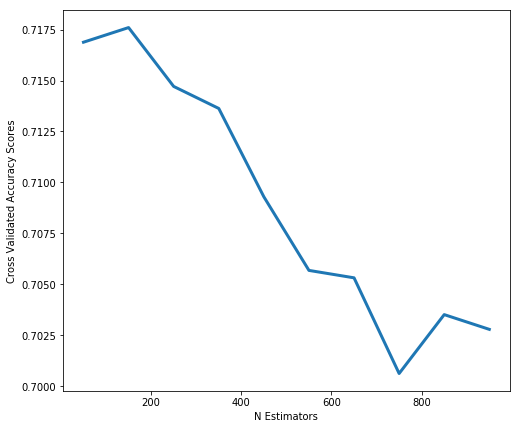

In [175]:
#Plot estimators versus scores

plt.figure(figsize= (8, 7))
plt.plot(estimators, cv_scores, linewidth = 3)
plt.xlabel("N Estimators")
plt.ylabel("Cross Validated Accuracy Scores");

In [179]:
#Derive best estimator value
sorted(zip(cv_scores, estimators), reverse = True)[0]

(0.71760074682891495, 150)

In [217]:
#Range of estimators in the model
est_range = range(50, 1050, 100)

#Dictionary of parameter values 
param_grid_ada = {}
param_grid_ada["n_estimators"] = est_range

In [218]:
#Intialize Grid
grid_ada = GridSearchCV(AdaBoostClassifier(), 
                       param_grid = param_grid_ada, cv = 5, scoring = "accuracy")

#Time the code 

t = time()

#Fit grid on data
grid_ada.fit(X, y)

#Print time difference

print (time() - t)

155.066141129


In [219]:
grid_ada.best_score_

0.7175875767425063

In [220]:
grid_ada.best_params_

{'n_estimators': 150}

In [221]:
grid_ada.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=150, random_state=None)